In [1]:
import numpy as np
import math
import time 
import sys 

sys.path.append('/Volumes/hard_drive/xtal/src/lib')

import matplotlib.pyplot as plt 
from integration import midpoint_quadrature
from integration import midpoint_quadrature_3
from distributions import gaussian, gaussian_cdf, find_min_std
from xtal_simulator import Crystal, Unit_Cell, Scatterer 
from amino_acid import threonine 
from math_func import is_within_ellipsoid, rotate_vector
from mpl_toolkits.mplot3d import Axes3D

In [23]:
x = Unit_Cell()
x.add_scatterers([Scatterer(np.array([1,1,1]), 'H')])

y = x.copy()
y.scatterers[0].set_type('C')
print(y.scatterers[0].get_type())
print(x.scatterers[0].get_type())

AttributeError: 'Unit_Cell' object has no attribute 'copy'

In [16]:
x = 1 
y = 2
tst_list = [x,y]
tst_list = [(x,x) for x in tst_list]

tst_list

[(1, 1), (2, 2)]

In [8]:
vec = np.array([1,0,0])
vec_1 = rotate_vector(vec, np.array([0,90,0]))

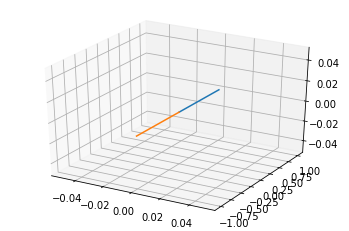

In [7]:
np.cos(math.radians(90))

6.123233995736766e-17

In [ ]:
uc_1 = threonine() 
uc_1.compute_sf_fft()

In [ ]:
aa_uc = threonine()
aa_uc.build_array()

In [ ]:
scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([3,3,3]))

scatt_2 = Scatterer() 
scatt_2.set_pos_mean(np.array([4,4,4]))

scatt_3 = Scatterer() 
scatt_3.set_pos_mean(np.array([5,3,3]))

scatt_4 = Scatterer() 
scatt_4.set_pos_mean(np.array([6,4,4]))

uc = Unit_Cell()
uc.set_dim(np.array([7,7,7]))
uc.add_scatterer(scatt_1)
uc.add_scatterer(scatt_2)
uc.add_scatterer(scatt_3)
uc.add_scatterer(scatt_4)
uc.show_graph(True)

In [ ]:
scatt = Scatterer() 
scatt.set_pos_mean(np.array([3,3,3]))

uc = Unit_Cell()
uc.set_dim(np.array([7,7,7]))
uc.add_scatterer(scatt)
fig = uc.show_graph()


In [ ]:
ax.view_init(30, 65)
plt.show()

In [ ]:
## test compute_sf function 
n_unit = 10
xtal = Crystal()
xtal.set_n_unit(n_unit)
xtal.set_unit_dim(np.array([50,50,50]))

scatt = Scatterer() 
scatt.set_pos_mean(np.array([25,25,25]))
scatt.set_pos_sigma(np.array([2,2,2]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, 1)

sf_n = xtal.compute_sf()
sf_a = np.e**(-2 * np.pi * np.array([1j]) * np.dot(np.array([1,1,1]), np.array([25,25,25])/ np.array([50,50,50])))
# B = 8 * np.pi**2 * 21.974 
# sf_a = sf_a * np.e**(-B * np.sin(0.1448434969985597)**2)
# sf_a = sf_a * np.e**(-3.137 * 8 * np.pi**2 * np.sin(0.1448434969985597)**2)
sf_a = sf_a * .844
print(sf_n[1,1,1] / n_unit**3, sf_a) 

In [ ]:
msd = 0 
for i in range(50): 
    d = (scatt.sample_center(np.array([50,50,50])) - np.array([25,25,25])) / np.array([50,50,50])
    d = np.sqrt(d[0]**2 + d[1]**2 + d[2]**2)
    print(d)
    
    msd = msd + d**2
    
msd = msd / 50
print('msd', msd)
print('sin', np.sin(0.1448434969985597)**2)
print('b', 8 * np.pi**2 * msd)
print('exp', -8 * np.pi**2 * msd * 0.01732050807568877**2)
np.e**(-8 * np.pi**2 * msd * 0.01732050807568877**2)

In [ ]:
np.sin(0.1448434969985597)

In [ ]:
d = 50 / np.sqrt(1 + 1 + 1)
1/(2*d)

In [ ]:
.3* np.random.randn(3) + .5 

In [ ]:
rmsd = 0
for i in range(100000): 
    rmsd = rmsd + np.random.randn()**2
    
rmsd = rmsd / 100000
rmsd = rmsd ** (1/2)
rmsd

In [ ]:
scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([3,3,3]))
scatt_1.set_pos_sigma(np.array([1,1,1]))
avg = 0
for i in range(1000):
    avg = avg + scatt_1.sample_center(np.array([7,7,7]))
    
avg / 1000

In [ ]:
scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([1,1,1]))

uc_1 = Unit_Cell() 
uc_1.set_dim(np.array([6,6,6]))
uc_1.add_scatterer(scatt_1)

np.sum(uc_1.compute_sf(np.array([6,6,6])) - np.fft.fftn(uc_1.build_array()))
                           

In [ ]:
np.fft.fftn(np.random.randn(8*6, 8*6, 8*6))

In [ ]:
## test compute_sf function 
xtal = Crystal()
xtal.set_n_unit(8)
xtal.set_unit_dim(np.array([6,6,6]))

scatt = Scatterer() 
scatt.set_pos_mean(np.array([1,1,1]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)

scatt = Scatterer() 
scatt.set_pos_mean(np.array([3,4,5]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, 1)

hkl = np.array([2,3,4])
sf = xtal.compute_sf()

print(sf[2,3,4] / 8**3) 


In [ ]:
sf = np.e**(-2 * np.pi * np.array([1j]) * np.dot(hkl, np.array([1,1,1])/ np.array([6,6,6])))
sf = sf + np.e**(-2 * np.pi * np.array([1j]) * np.dot(hkl, np.array([3,4,5])/ np.array([6,6,6])))
print(sf)



In [ ]:
xtal.FT()[8,8,8]

In [ ]:
np.array([-.5-.5j])**2

In [ ]:
xtal = Crystal()
xtal.set_n_unit(8)
xtal.set_unit_dim(np.array([5,5,5]))

scatt = Scatterer() 
scatt.set_pos_mean(np.array([1,1,1]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, .5)

scatt = Scatterer() 
scatt.set_pos_mean(np.array([3,3,3]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, .5)

hkl = np.array([1,1,1])
freq = xtal.FT()
sf = xtal.compute_sf(hkl)

print(sf)

# print(xtal.unit_cells)


In [ ]:
xtal = Crystal()
xtal.set_n_unit(8)
xtal.set_unit_dim(np.array([5,5,5]))

scatt = Scatterer() 
scatt.set_pos_mean(np.array([3,3,3]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, 1)

hkl = np.array([1,1,1])
freq = xtal.FT()
sf = xtal.compute_sf(hkl)

print(sf)

# print(xtal.unit_cells)


In [ ]:
xtal = Crystal()
xtal.set_n_unit(8)
xtal.set_unit_dim(np.array([5,5,5]))

scatt = Scatterer() 
scatt.set_pos_mean(np.array([1,1,1]))
scatt.set_pos_sigma(np.array([0,0,0]))
scatt.set_radius(np.array([0,0,0]))

uc = Unit_Cell()
uc.add_scatterer(scatt)
xtal.create_unit_cell(uc, 1)

hkl = np.array([1,1,1])
freq = xtal.FT()
sf = xtal.compute_sf(hkl)

print(sf)

# print(xtal.unit_cells)


In [ ]:
hkl = np.array([0,0,0])
freq = xtal.FT()
sf = xtal.compute_sf(hkl)
print(sf)

In [ ]:
sf = np.e**(-2 * np.pi * np.array([1j]) * np.dot(hkl, np.array([2,2,2])/ np.array([5,5,5])))
sf * 8**3

In [ ]:
scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([1,1,0]))
scatt_1.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([0,0,0]))

uc_1 = Unit_Cell()
uc_1.add_scatterer(scatt_1)
uc_1.set_dim(np.array([3,3,3]))

scatt_2 = Scatterer() 
scatt_2.set_pos_mean(np.array([1,1,2]))
scatt_2.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([0,0,0]))

uc_2 = Unit_Cell()
uc_2.add_scatterer(scatt_2)
uc_2.set_dim(np.array([3,3,3]))



In [ ]:
ft_1 = np.fft.fftn(uc_1.build_array())
ft_2 = np.fft.fftn(uc_2.build_array())
                       
print(ft_1)
print(ft_2)

In [ ]:
## test compute_ft function 
scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([1,1,0]))
scatt_1.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([0,0,0]))

uc_1 = Unit_Cell()
uc_1.add_scatterer(scatt_1)
uc_1.set_dim(np.array([3,3,3]))

scatt_2 = Scatterer() 
scatt_2.set_pos_mean(np.array([1,1,2]))
scatt_2.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([0,0,0]))

uc_2 = Unit_Cell()
uc_2.add_scatterer(scatt_2)
uc_2.set_dim(np.array([3,3,3]))

sf_arr = np.ndarray([6,3,3],  dtype=complex)
for i in range(6): 
    for j in range(3): 
        for k in range(3): 
            hkl = np.array([i,j,k])
            sf_1 = uc_1.compute_ft(np.array([0,0,0]), hkl, np.array([6,3,3]))
            sf_2 = uc_2.compute_ft(np.array([3,0,0]), hkl, np.array([6,3,3]))
            
            sf_arr[i,j,k] = sf_1 + sf_2

x = np.zeros([3,3,3])
x[1,1,0] = 1 
y = np.zeros([3,3,3])
y[1,1,2] = 1
ft = np.fft.fftn(np.concatenate([x,y]))

np.mean(sf_arr - ft)

In [ ]:
sf_2 + sf_1

In [ ]:
## explore additive nature of fourier transforms 
x = np.zeros([3,3,3])
x[1,1,0] = 1 
y = np.zeros([3,3,3])
y[1,1,2] = 1
ft = np.fft.fftn(np.concatenate([x,y]))
hkl = np.array([1,1,1])
sf = np.e**(-2 * np.pi * np.array([1j]) * np.dot(hkl, np.array([1,1,0]/ np.array([6,3,3]))) )
sf = sf + np.e**(-2 * np.pi * np.array([1j]) * np.dot(hkl, (np.array([1,1,2])+np.array([3,0,0]))/ np.array([6,3,3])))
print(ft[1,1,1], sf)



In [ ]:
np.concatenate([x,y])[4,1,2]

In [ ]:
midpoint_quadrature(lambda x: x**2, 1, 0, 10)

In [ ]:
midpoint_quadrature_3(lambda x,y,z: x**2*y**3*z**4, (10,10,10), (1,1,1), (3,3,3))

In [ ]:
sigma = np.identity(3)*4
gaussian(np.array([1,0,0]), np.array([0,0,0]), sigma)

In [ ]:
def gaussian_wrapper(x,y,z): 
    return gaussian(np.array([x,y,z]), np.array([0,0,0]),  np.identity(3))

In [ ]:
midpoint_quadrature_3(gaussian_wrapper, (100,100,100), (-10,-10,-10), (10,10,10))

In [ ]:
midpoint_quadrature_3(gaussian_wrapper, np.array([25]*3), np.array([-10]*3), np.array([10]*3))

In [ ]:
F = list() 
for i in [1,2,5,10,25,50,100,200]:
    print(i)
    F.append(midpoint_quadrature_3(gaussian_wrapper,  (i,i,i), (-10,-10,-10), (10,10,10))) 
             
F            

In [ ]:
x = np.ndarray([5,5,5])
for i in range(x.shape[0]): 
    for j in range(x.shape[1]): 
        for k in range(x.shape[2]): 
            x[i,j,k] = gaussian(np.array([i,j,k]), np.array([2,2,2]), np.identity(3))
x

In [ ]:
xtal_1 = Crystal()
xtal_1.set_n_unit(8)
xtal_1.set_unit_dim(np.array([5,5,5]))

scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([2,2,2]))
scatt_1.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([2,2,2]))

uc_1 = Unit_Cell()
uc_1.add_scatterer(scatt_1)
xtal_1.create_unit_cell(uc_1, 1)

freq_1 = xtal_1.FT()

print(np.absolute(freq_1[8,0,0]))
print(np.absolute(freq_1[16,0,0]))
print(np.absolute(freq_1[24,0,0]))
print(np.absolute(freq_1[32,0,0]))

print(freq_1[8,0,0])
print(freq_1[16,0,0])
print(freq_1[24,0,0])
print(freq_1[32,0,0])

In [ ]:
np.absolute(np.fft.fftn(uc_1.build_array()[2:7,2:7,2:7])[3,0,0]) * 6**3

In [ ]:
1 * np.e**(-2 * np.pi * np.array([1j]) * (9/2))

In [ ]:
test_arr = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]*3)
ft = np.fft.fft(test_arr)
ft[3]

In [ ]:
ft_list = list() 
for i in range(40): 
    ft_list.append(np.e ** (2 * np.pi * 2 * i / 40 * np.array([1j])))
ft_list
    

In [ ]:
test_arr = [0]*50 
test_arr.extend([1])
test_arr.extend([0]*50)
test_arr = test_arr * 100000
np.fft.fft(test_arr)[100000]
# print(np.absolute(np.fft.fft(test_arr)[10000]))
# print(np.fft.fft(test_arr)[10000])
# test_arr = np.array([0,1,0,0,0]*10000)
# np.fft.fft(test_arr)[10000]
# print(np.absolute(np.fft.fft(test_arr)[10000]))

In [ ]:
for i in range(8): 
    print(i, np.e ** (6 * np.pi * 2 * i / 8 * np.array([1j])))

In [ ]:
xtal_1 = Crystal()
xtal_1.set_n_unit(1)
xtal_1.set_unit_dim(np.array([100,100,100]))

scatt_1 = Scatterer() 
scatt_1.set_pos_mean(np.array([int(1/5 * 100),int(1/4 * 100),int(1/4 * 100)]))
scatt_1.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([0,0,0]))

uc_1 = Unit_Cell()
uc_1.add_scatterer(scatt_1)
xtal_1.create_unit_cell(uc_1, 1)
# scatterers = np.array([[4,4,4]])
# xtal_1.create_unit_cell(scatterers, .5)

# scatterers = np.array([[4,5,6]])
# xtal_1.create_unit_cell(scatterers, .5)

freq_2 = xtal_1.FT()
# freq_2 = xtal_1.FT()
# freq_3 = xtal_1.FT() 
# freq_1.shape


In [ ]:
freq_2[7,2,1]

In [ ]:
np.round(np.random.rand(3) * np.array([100,100,100])).astype(int)

In [ ]:
sf = np.e ** (-2 * np.pi * np.array([1j]) * np.dot(np.array([7,2,1]), np.array([1/4,1/4,1/4])))
print(sf)


In [ ]:
test_scatt = Scatterer()
scatt_1.set_pos_mean(np.array([0,0,0]))
scatt_1.set_pos_sigma(np.array([0,0,0]))
scatt_1.set_radius(np.array([1,1,1]))
scatt_1.get_scatterer_in_array(np.array([1,1,1]), np.array([0,0,0]))
## dual meaning of radius? 

In [ ]:
np.e ** (2 * np.pi * np.array([1j]) * np.dot(np.array([1/2, 1/2, 1/2]), np.array([1,2,3])))

In [ ]:
np.e ** (2 * np.pi * np.array([1j]) * np.dot(np.array([1/4, 1/4, 1/4]), np.array([2,2,2])))

In [ ]:
np.e ** (2 * np.pi * np.array([1j]) * np.dot(np.array([1/4, 1/4, 1/4]), np.array([1,2,3])))

In [ ]:
print(freq_1[5,0,0])
print(freq_2[5,0,0])

In [ ]:
print(freq_1[10,0,0])
print(freq_2[10,0,0])

In [ ]:
np.save('test.npy', freq_1[:50,:50,:25])

In [ ]:
x = np.load('test.npy')
x.shape

In [ ]:
freq_1 = xtal_1.FT(None)
freq_1[0,0,0]

In [ ]:
times = list()
for i in range(1,10): 
    print(i)
    xtal = Crystal()
    xtal.set_n_unit(i**3)
    xtal.set_unit_dim(np.array([25,25,25]))
    scatterers = np.array([[12,12,12],[12,18,12],[12,6,12],[18,12,12],[6,12,12],[12,12,18],[12,12,6]])
    xtal.create_unit_cell(scatterers, 1)
    
    t1 = time.time() 
    arr = xtal.FT()
    freq = np.fft.fftn(arr)
    t2 = time.time()
    
    times.append(t2-t1)

plt.plot(range(1,10), times)

In [ ]:
a = np.polyfit(range(1,10), times, 2)

In [ ]:
def f(x): 
    return a[0] * x**2 + a[1] * x + a[2] 

f(1000) / 60 / 60

In [ ]:
x = np.ndarray([4,4,4])
x.nbytes / 64

In [ ]:
arr = np.array([1,0,0,0]*4)
np.fft.fft(arr)

In [ ]:
def ft_exp(k,x,N): 
    return np.e**(-np.array([1j])*2*np.pi*k*x/N)

In [ ]:
np.absolute(ft_exp(1,0,16))

In [ ]:
for i in range(17):
    if i % 4 == 0: 
        print(i, '\t', 1*ft_exp(1,i,16))
    else: 
        print(i, '\t', 0*ft_exp(1,i,16))

In [ ]:
is_within_ellipsoid(np.array([2,0,2]), np.array([1,0,.5]), np.array([1,1,1]))

In [ ]:
scatt = Scatterer()
scatt.set_pos_mean(np.array([1,1,1]))
scatt.set_pos_sigma(3)
scatt.set_radius(np.array([3,3,3]))
# arr = scatt.get_scatterer_in_array(np.array([9,9,9]))
# np.sum(arr)

In [ ]:
for i in range(10): 
    print(scatt.sample_center(np.array([3,3,3])))

In [ ]:
uc = Unit_Cell() 
uc.set_dim(np.array([3,3,3]))
uc.add_scatterer(scatt)
arr = uc.build_array()
arr

In [ ]:
find_min_std(4, .999)